# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Elsa\AppData\Local\Temp\ipykernel_11220\131226104.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
elteams=pd.read_csv("datasets/actual.csv")
ecteams=pd.read_excel("datasets/ec2023.xlsx", index_col=False)

In [4]:
#repito los arreglos de los datasets para que queden como la última vez:
ecteams["Competition"]="Eurocup"

In [5]:
#repito los arreglos de los datasets para que queden como la última vez:
ecteams.drop("Ganador", axis=1, inplace=True)
ecteams.rename(columns={"Winner":"Ganador"}, inplace=True)


In [6]:
ecteams.columns = [i.lower() for i in ecteams.columns]
elteams.columns = [i.lower() for i in elteams.columns]

In [7]:
comp_ec = ecteams.loc[:, ["competition", "localscore", "roadscore", "plusminus", "ganador"]]
comp_el = elteams.loc[:, ["competition", "localscore", "roadscore", "plusminus", "ganador"]]

In [8]:
competition = pd.concat([comp_ec,comp_el])

In [39]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (10.,6.)})
sns.set_style("whitegrid")

In [12]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [10]:
# 1
competition.competition.value_counts()

competition
Euroleague    225
Eurocup       173
Name: count, dtype: int64

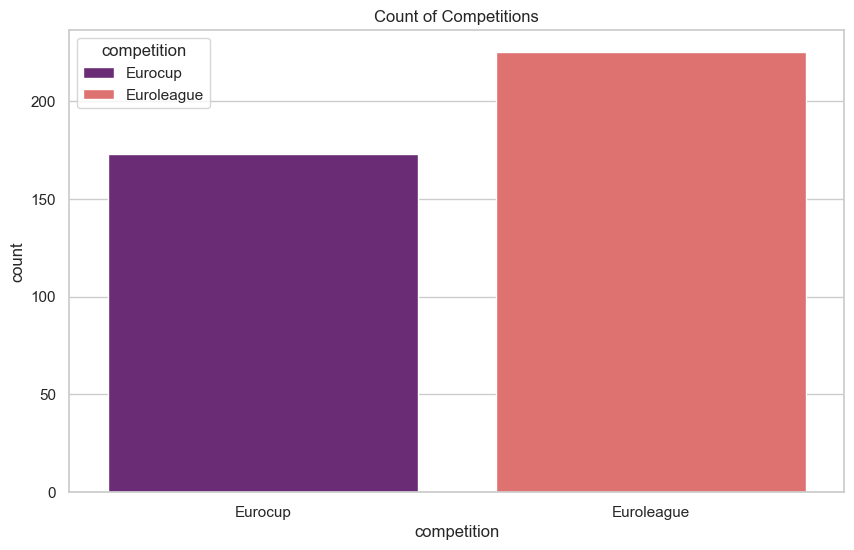

In [40]:
sns.countplot(x="competition", data=competition, hue="competition", palette="magma", legend=True)
plt.title("Count of Competitions")
plt.show()

In [17]:
# 2
competition.groupby("competition").agg({"localscore":"max","roadscore":"max"})


,localscore,roadscore
competition,,
Eurocup,120,114.0
Euroleague,130,126.0


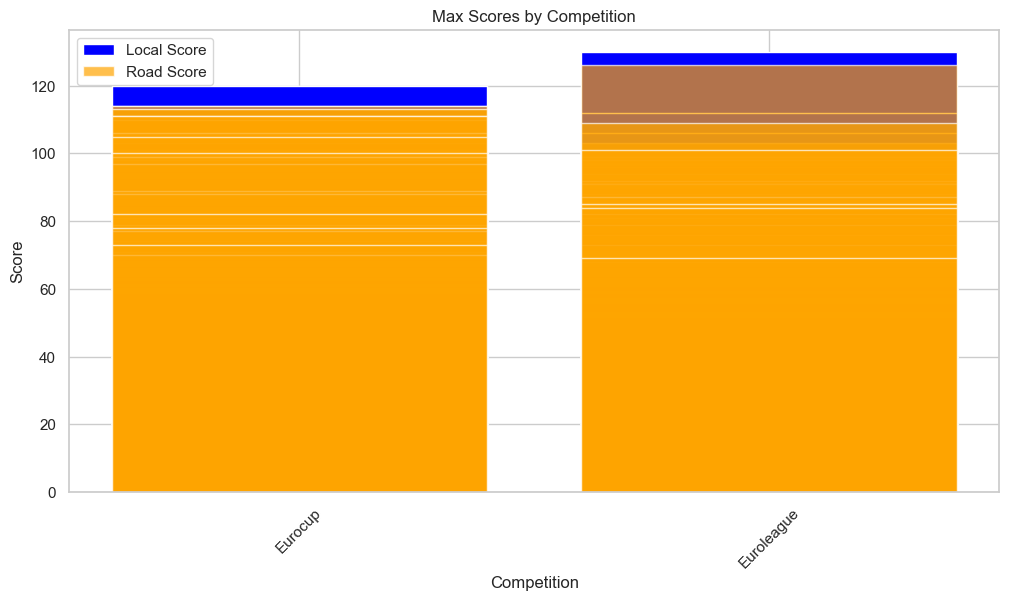

In [24]:
plt.bar(competition['competition'], competition['localscore'], color='blue', label='Local Score')
plt.bar(competition['competition'], competition['roadscore'], color='orange', label='Road Score',alpha=0.7)
plt.xlabel('Competition')
plt.ylabel('Score')
plt.title('Max Scores by Competition')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [25]:
# 3
competition.groupby("competition").agg({"localscore":"mean","roadscore":"mean"})

,localscore,roadscore
competition,,
Eurocup,85.150289,83.936047
Euroleague,83.284444,79.173333


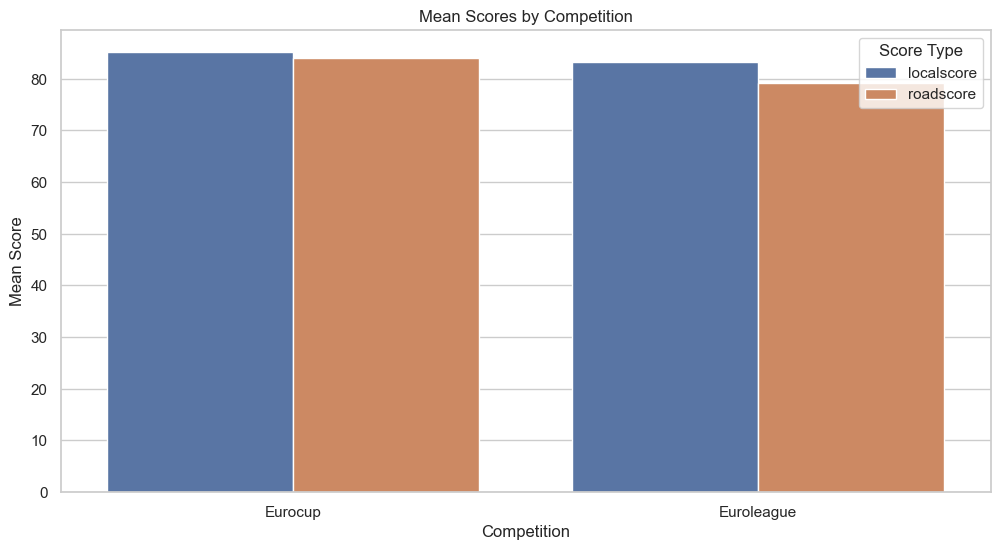

In [38]:
competition_mean = competition.groupby("competition").agg({"localscore": "mean", "roadscore": "mean"}).reset_index()
competition_melted = pd.melt(competition_mean, id_vars=['competition'], var_name='score_type', value_name='mean_score')
sns.barplot(x='competition', y='mean_score', hue='score_type', data=competition_melted)
plt.xlabel('Competition')
plt.ylabel('Mean Score')
plt.title('Mean Scores by Competition')
plt.legend(title='Score Type')

plt.show()


In [42]:
# 4
competition['absolut_plusminus'] = np.abs(competition['plusminus'])
max_diff_competition = competition.groupby('competition')['absolut_plusminus'].max()
print(max_diff_competition)

competition
Eurocup       39.0
Euroleague    39.0
Name: absolut_plusminus, dtype: float64


(array([0, 1]), [Text(0, 0, 'Eurocup'), Text(1, 0, 'Euroleague')])

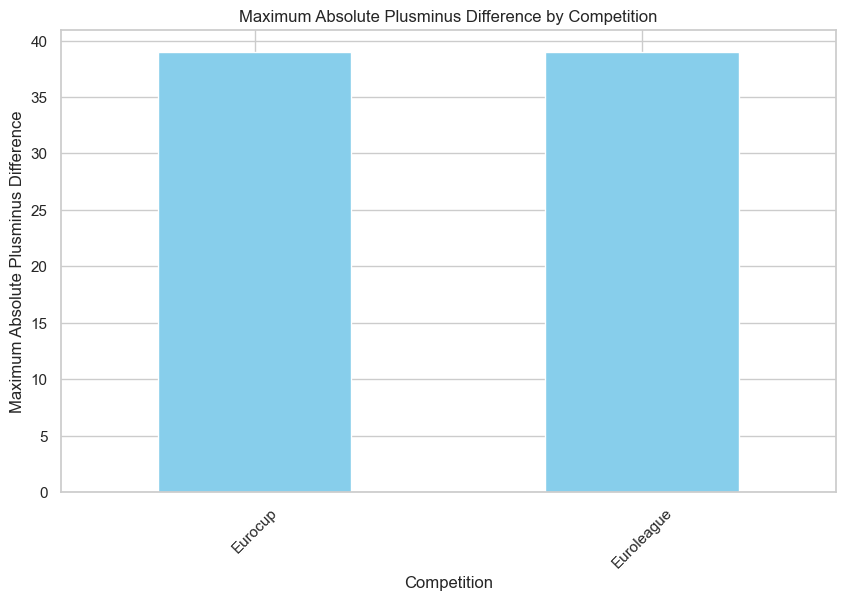

In [44]:
max_diff_competition.plot(kind='bar', color='skyblue')
plt.xlabel('Competition')
plt.ylabel('Maximum Absolute Plusminus Difference')
plt.title('Maximum Absolute Plusminus Difference by Competition')
plt.xticks(rotation = 45)

In [45]:
# 5
wins_competition = competition.groupby(['competition', 'ganador']).size()

Text(0.5, 1.0, 'Wins by Competition and Winner')

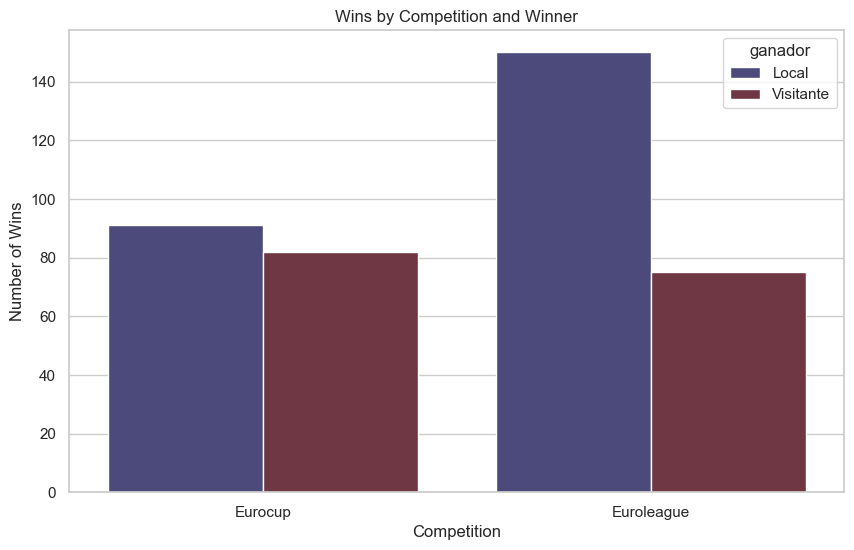

In [47]:
wins_competition = competition.groupby(['competition', 'ganador']).size().reset_index(name='wins')
sns.barplot(x='competition', y='wins', hue='ganador', palette= "icefire", data=wins_competition)
plt.xlabel('Competition')
plt.ylabel('Number of Wins')
plt.title('Wins by Competition and Winner')


# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

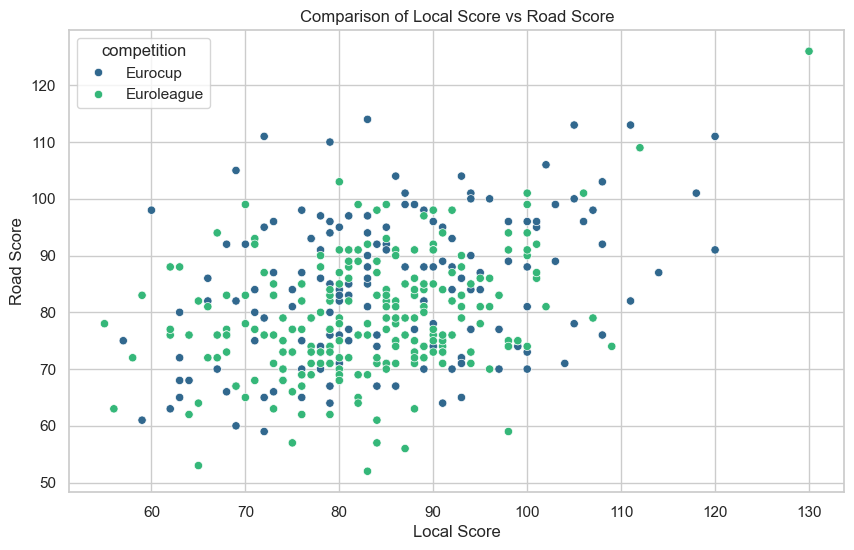

In [49]:
# Comparison Chart
competition.reset_index(drop=True, inplace=True)

sns.scatterplot(data=competition, x='localscore', y='roadscore', hue="competition", palette="viridis")
plt.title('Comparison of Local Score vs Road Score')
plt.xlabel('Local Score')
plt.ylabel('Road Score')
plt.show()

**Your comments here**
- Se oberva que el localcore y roadscore en ambas competiciones en las m´tricas centrales de puntuaciones se asemejan
- En el caso de la Euroleague, hay alguna obervación de puntuación alta en el localscore (se podria considerar outlayer)

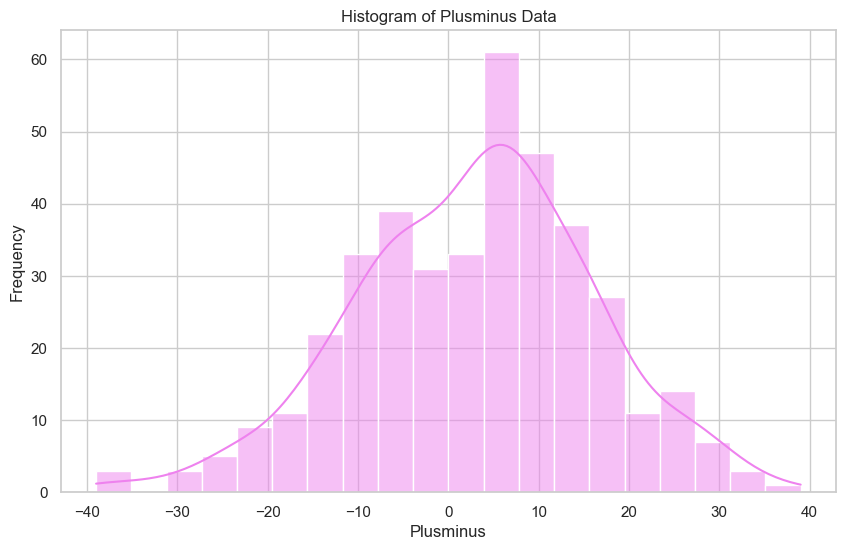

In [52]:
# Histogram
sns.histplot(competition['plusminus'], bins=20, kde=True, color="violet")
plt.title('Histogram of Plusminus Data')
plt.xlabel('Plusminus')
plt.ylabel('Frequency')
plt.show()

**Your comments here**
- Se oberva una disribución bastante normal
- El valor de plusminus mas frecuente es de numeros en positivo indicador de mayoría de ganadores locales

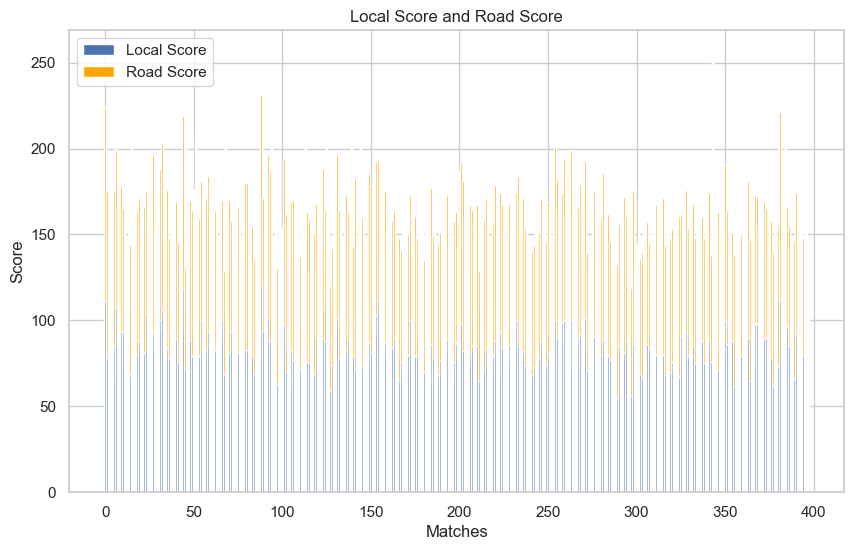

In [59]:
localscore = competition['localscore']
roadscore = competition['roadscore']
index = range(len(competition))
plt.bar(index, localscore, color='b', label='Local Score')
plt.bar(index, roadscore, color='orange', bottom=localscore, label='Road Score')
plt.title('Local Score and Road Score')
plt.xlabel('Matches')
plt.ylabel('Score')
plt.legend()
plt.show()

**Your comments here**
- A pesar que es dificil apreciar individualmente los resultados ya que contempla todas las obervaciones del df
- asi que vamos a provar con un sample del dataframe:

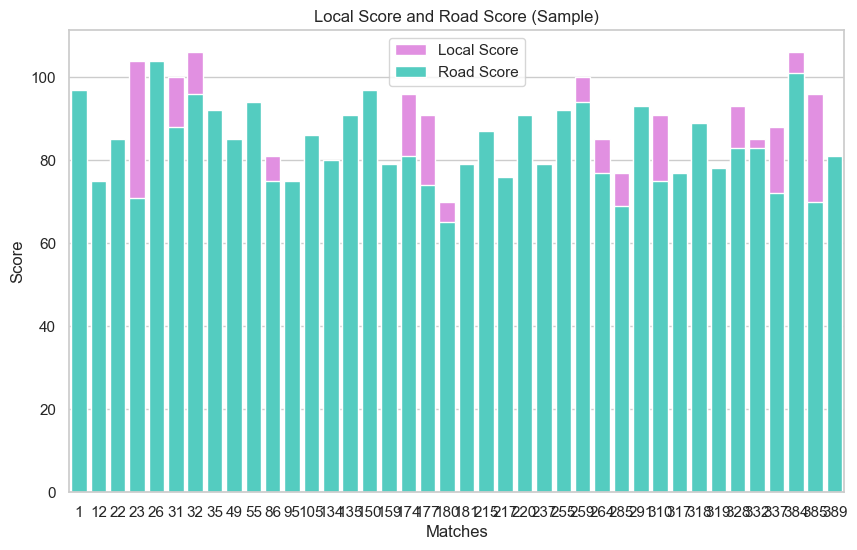

In [63]:
sample_df = competition.sample(n=40)
sns.set_palette("Set2")
sns.barplot(data=sample_df, x=sample_df.index, y='localscore', color='violet', label='Local Score')
sns.barplot(data=sample_df, x=sample_df.index, y='roadscore', color='turquoise', label='Road Score')
plt.title('Local Score and Road Score (Sample)')
plt.xlabel('Matches')
plt.ylabel('Score')
plt.legend()
plt.show()

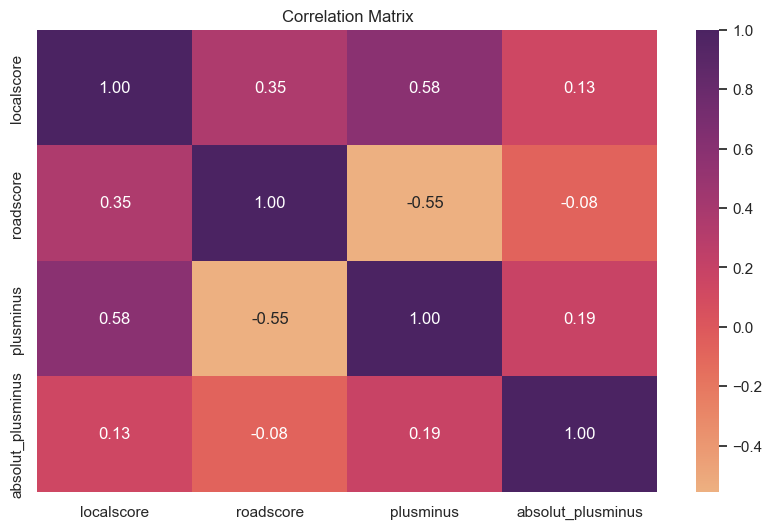

In [67]:
# Correlation / Heatmap
numerical = competition.select_dtypes(include='number')
correlation_matrix = numerical.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Your comments here**
- Se observa la correlación de las 4 métricas numéricas del database y resumiendo estos valores
- Como que el roadscore tiene valores mas bajos de plusminus o que a la inversa el localscore tiene valores mas elevados de plusminus

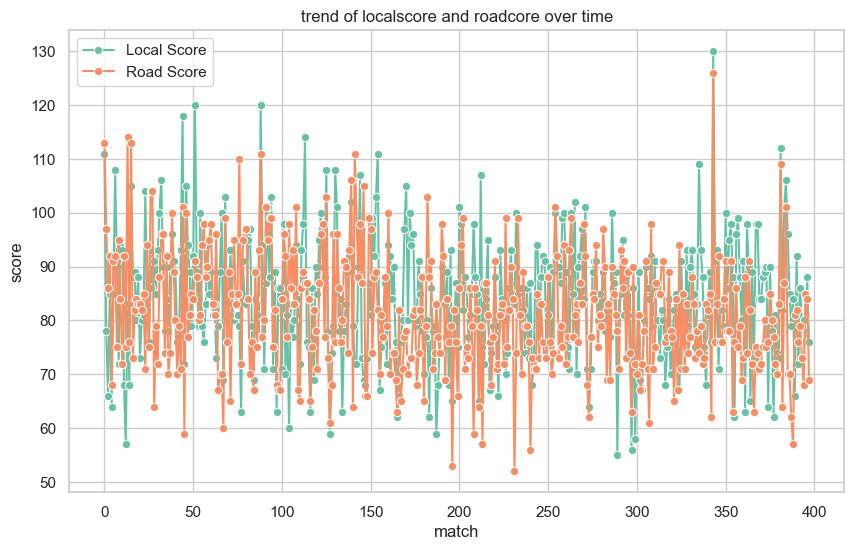

In [77]:
# Trends
sns.lineplot(data=competition, x=competition.index, y='localscore', label='Local Score', marker='o')
sns.lineplot(data=competition, x=competition.index, y='roadscore', label='Road Score', marker='o')
plt.title('trend of localscore and roadcore over time')
plt.xlabel('match')
plt.ylabel('score')
plt.legend()
plt.show()

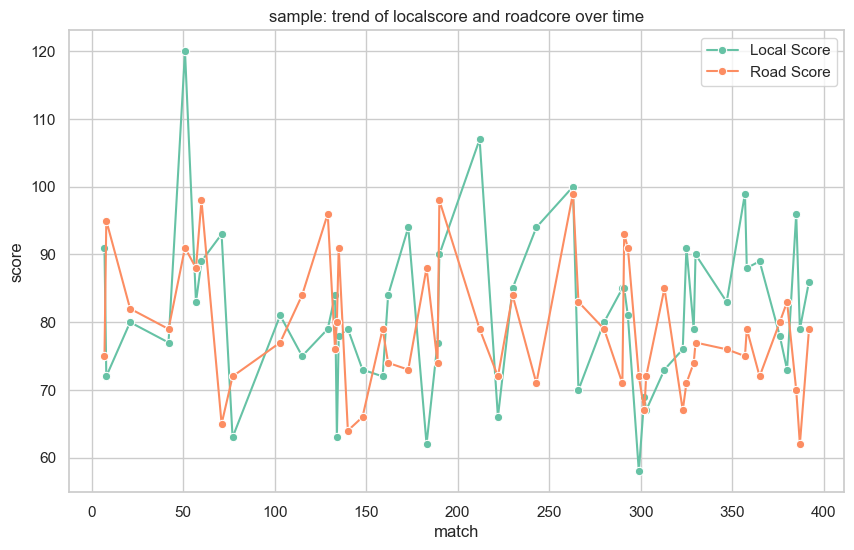

In [75]:

#lo hacemos con un sample del dataframe
sample_df = competition.sample(n=50)
sns.lineplot(data=sample_df, x=sample_df.index, y='localscore', label='Local Score', marker='o')
sns.lineplot(data=sample_df, x=sample_df.index, y='roadscore', label='Road Score', marker='o')
plt.title('sample: trend of localscore and roadcore over time')
plt.xlabel('match')
plt.ylabel('score')
plt.legend()
plt.show()

**Your comments here**
- en el primer trend chart al albergar todas las observaciones del dataframe resulta difícil discernir a parte de algun dato que sale por encima de los valores regulares.
- En el sample se puede ver mejor la dinámica general y que el localscore suele ser mas elevado 